## Varying $\tau_{reio}$

In [156]:
import pandas as pd
import numpy as np
from classy import Class
import matplotlib.pyplot as plt

In [157]:
# LambdaCDM parameters
h = 0.67810
ob = 0.02238280
ocdm = 0.1201075
t_reio = np.linspace(0.02, 0.12, 6, endpoint=True)
l_max_scalars = 3000

In [158]:
ell_list = []
EE_list = []
TE_list = []
TT_list = []
tau_list = []

In [159]:
for i in range (len(t_reio)):
    params = {'h':h,'omega_b':ob,'omega_cdm': ocdm,'A_s':2.100549e-09,'tau_reio': t_reio[i]}
    output = {'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,'l_max_scalars':l_max_scalars}
    cosmo = Class()
    cosmo.set(params)
    cosmo.set(output)
    cosmo.compute()

    cl_tot = cosmo.raw_cl(l_max_scalars)
    ell = cl_tot['ell']
    EE = cl_tot['ee']
    TE = cl_tot['te']
    TT = cl_tot['tt']
    tau = np.array([t_reio[i] for m in range(len(ell))])

    ell_list.extend(ell)
    EE_list.extend(EE)
    TE_list.extend(TE)
    TT_list.extend(TT)
    tau_list.extend(tau)


data = {'ell':ell_list,'tau':tau_list, 'EE':EE_list, 'TE':TE_list, 'TT':TT_list}
df = pd.DataFrame(data)
#df.to_csv('CL_6.csv', index=False) 

----
# PLOT
----

In [160]:
a = len(t_reio)
b = len(ell_list)
alpha = int(b/a)
ell = np.array(ell_list[0:alpha])
factor = (10**12)*ell*(ell+1.)/(2*np.pi)

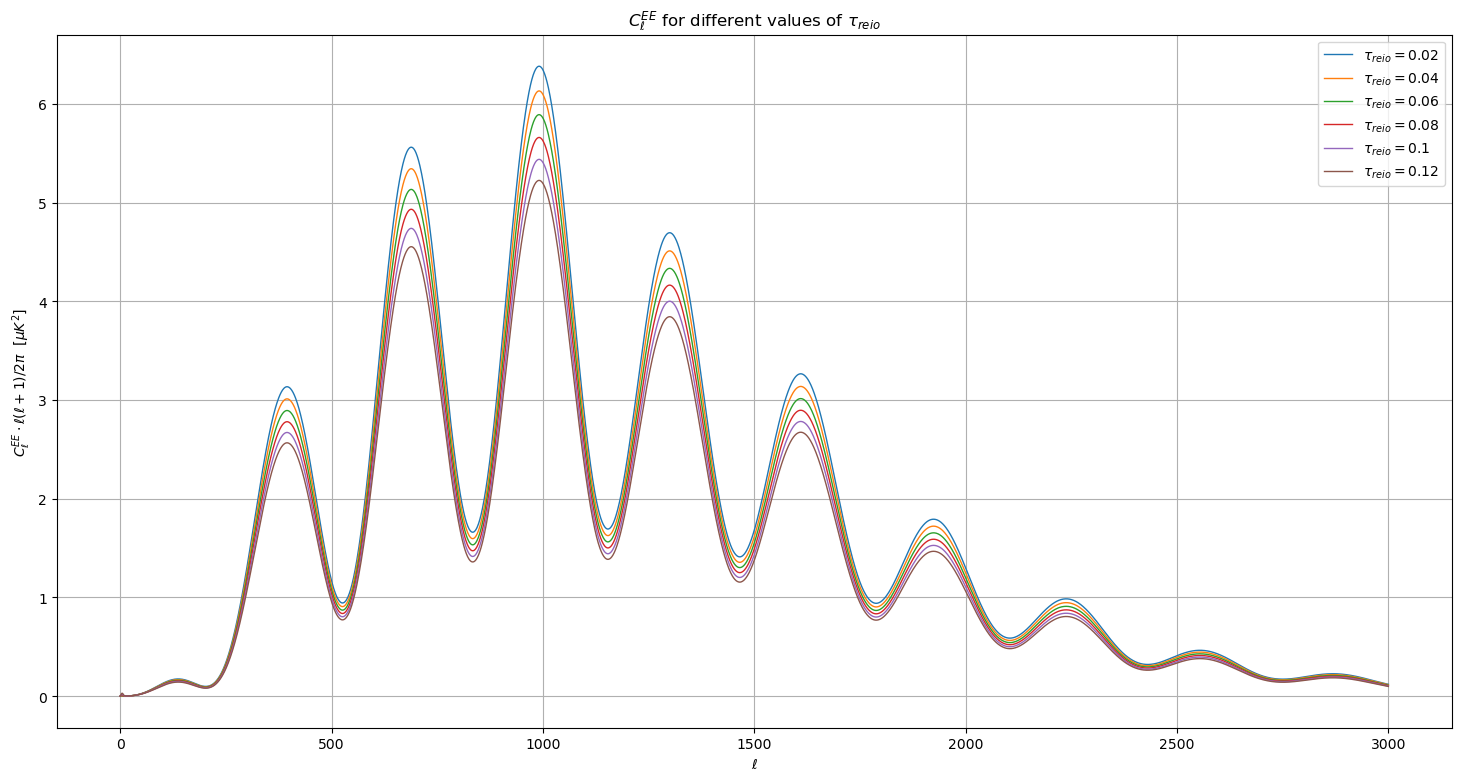

In [185]:
plt.figure(figsize=(18, 9))
#plt.xlim([2,3000])
for i in range(a):
    l = ell_list[i * alpha:(i + 1) * alpha]
    ee = EE_list[i * alpha:(i + 1) * alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.plot(l, factor * ee, lw=1, label=string)
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  


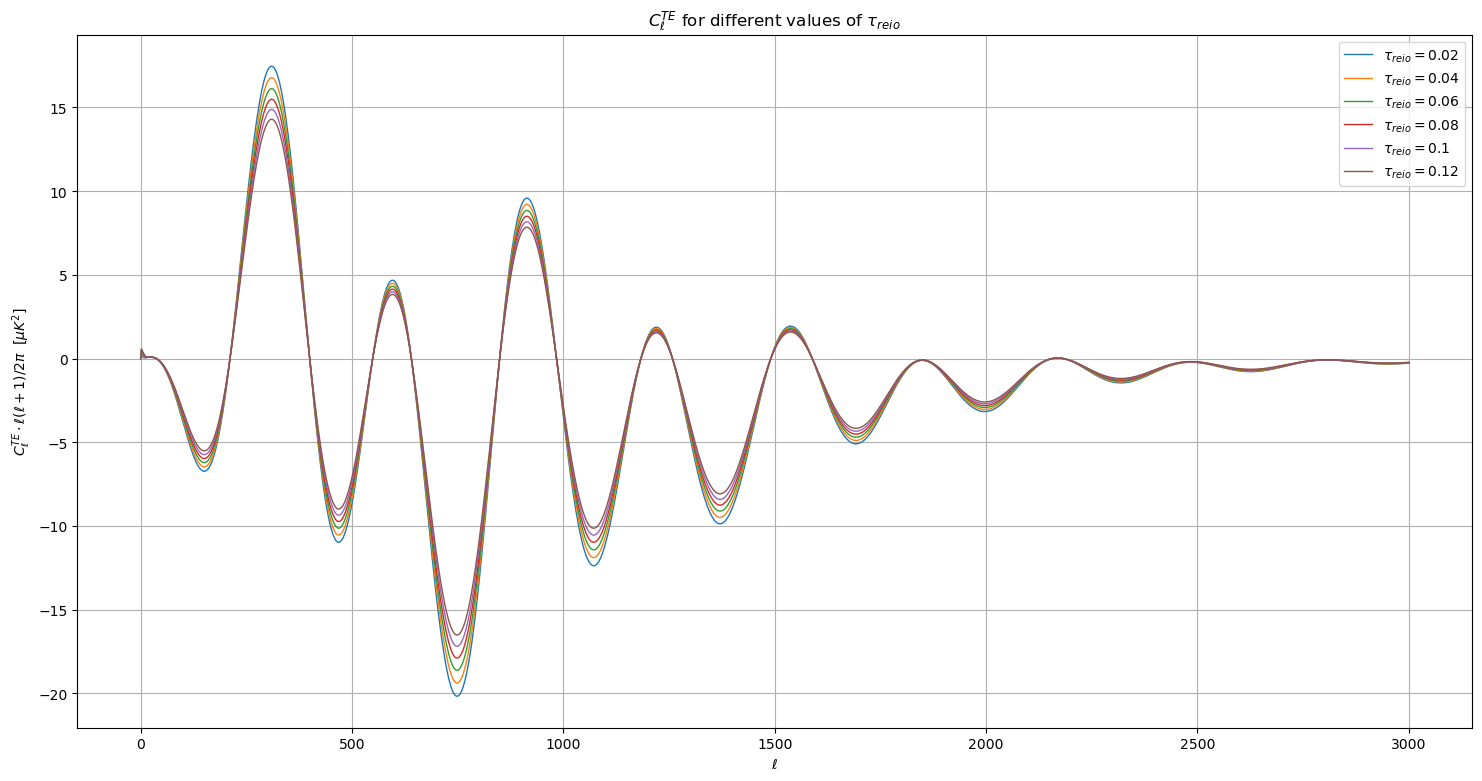

In [162]:
plt.figure(figsize=(18, 9))
#plt.xlim([2,3000])
for i in range(a):
    l = ell_list[i * alpha:(i + 1) * alpha]
    ee = TE_list[i * alpha:(i + 1) * alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.plot(l,factor * ee, lw=1, label=string)
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel('$C^{TE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{TE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  

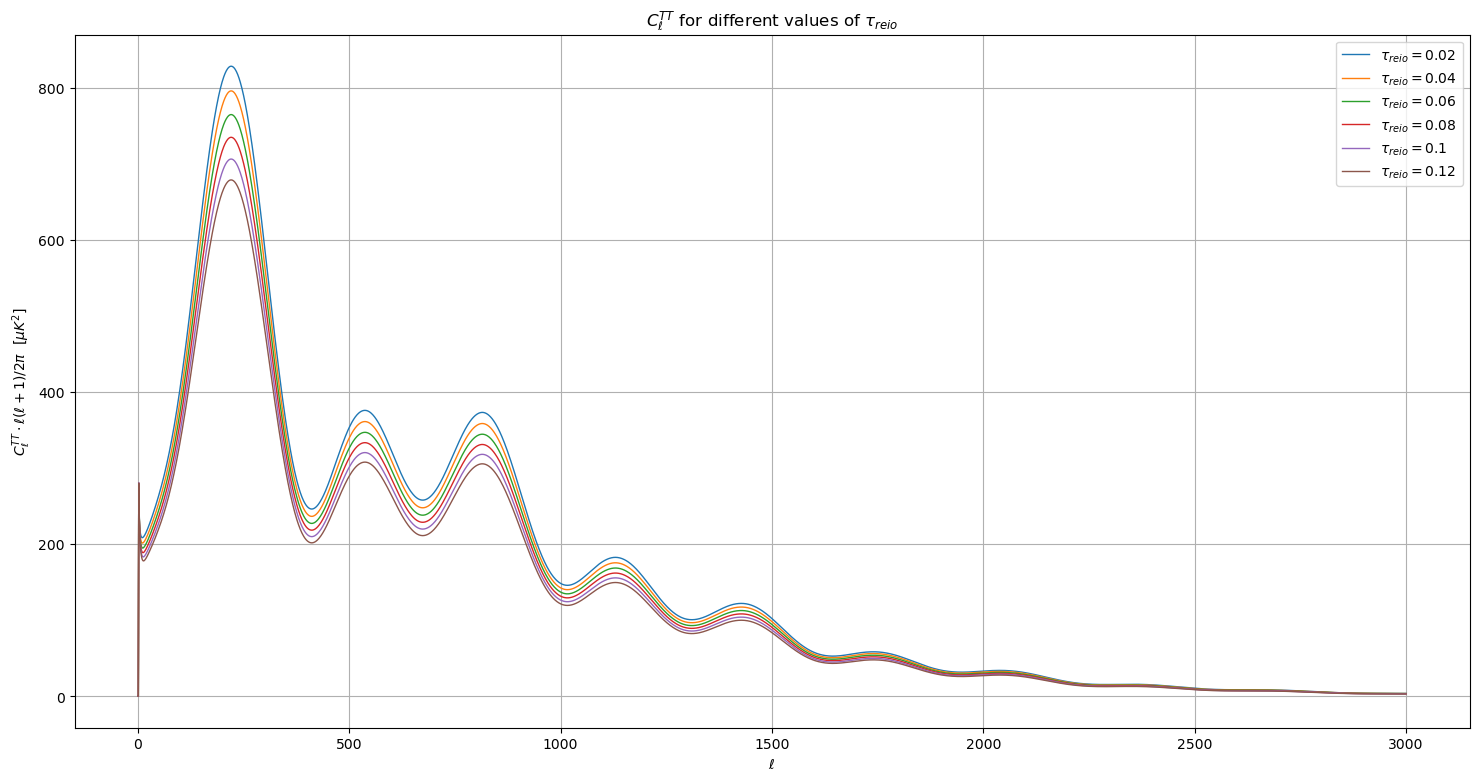

In [163]:
plt.figure(figsize=(18, 9))
#plt.xlim([2,3000])
for i in range(a):
    l = ell_list[i * alpha:(i + 1) * alpha]
    ee = TT_list[i * alpha:(i + 1) * alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.plot(l, factor * ee, lw=1, label=string)
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel('$C^{TT}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{TT}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  

----
# RATIO PLOT
----

$$\frac{C_{\ell}^{EE}(\tau_{reio})}{C_{\ell}^{EE}(0.02)}$$

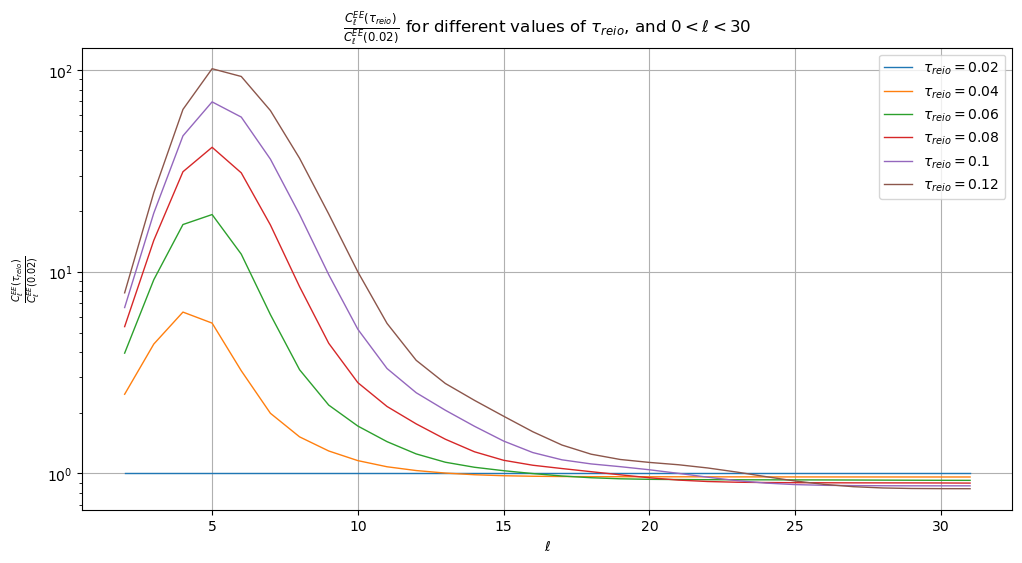

In [187]:
plt.figure(figsize=(12, 6))
#plt.xlim([2,3000])
for i in range(a):
    l = ell_list[i * alpha+2:(i + 1) * alpha]
    ee = np.array(EE_list[(i * alpha)+2:(i + 1) * alpha])/np.array(EE_list[2:alpha])
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.semilogy(l[0:30], ee[0:30], lw=1, label=string)
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{EE}(\tau_{reio})}{C_{\ell}^{EE}(0.02)}$')
plt.title(r'$\frac{C_{\ell}^{EE}(\tau_{reio})}{C_{\ell}^{EE}(0.02)}$ for different values of $\tau_{reio}$, and $0<\ell<30}$')
plt.grid(True)
plt.show()  

* for $\ell < 30$ we can see that $C_{\ell}^{EE}$ is proportional to $\tau$, but we don't know in what way
+ for $\ell >> 30$ we can see that $C_{\ell}^{EE}$ is inversely proportional to $\tau$, but we don't know in what way

----

$$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$$

1.0
0.9042912221245788
-1.037915729290742
-3.769600534639913
-17.419689104735
-23.41395496282417


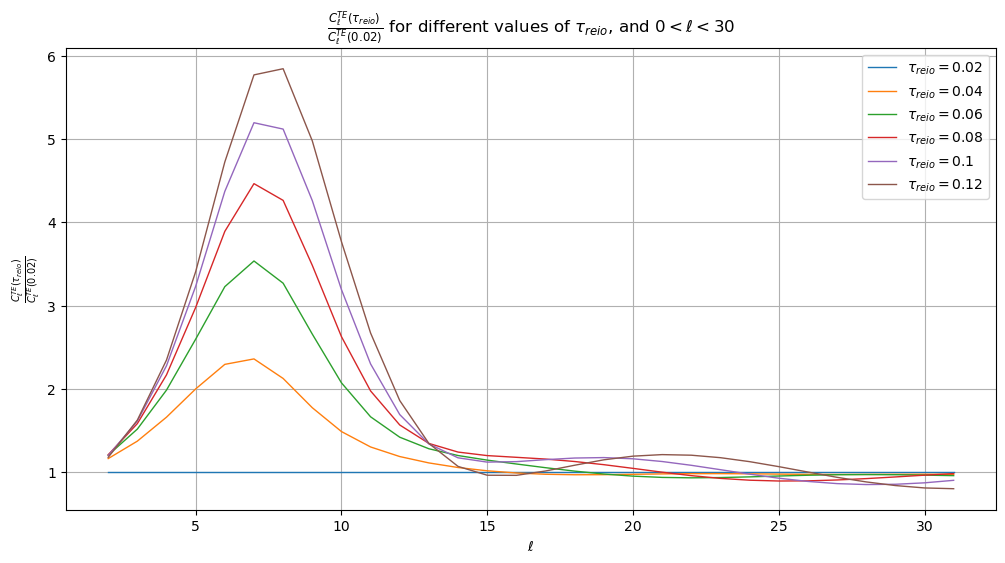

In [170]:
plt.figure(figsize=(12, 6))
for i in range(a):
    l = ell_list[i * alpha+2:(i + 1) * alpha]
    ee = np.array(TE_list[(i * alpha)+2:(i + 1) * alpha])/np.array(TE_list[2:alpha])
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.plot(l[0:30], abs(ee[0:30]), lw=1, label=string)
    plt.legend()

plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$')
plt.title(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$ for different values of $\tau_{reio}$, and $0<\ell<30$')
plt.grid(True)
plt.show()  

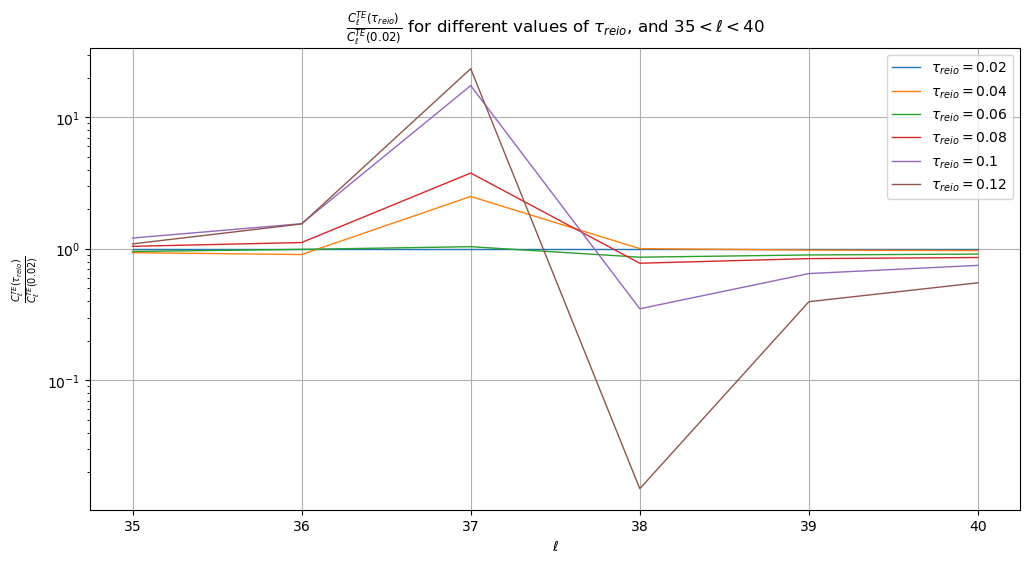

In [178]:
plt.figure(figsize=(12, 6))
for i in range(a):
    l = ell_list[i * alpha+2:(i + 1) * alpha]
    ee = np.array(TE_list[(i * alpha)+2:(i + 1) * alpha])/np.array(TE_list[2:alpha])
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.semilogy(l[33:39], abs(ee[33:39]), lw=1, label=string)
    plt.legend()

plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$')
plt.title(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$ for different values of $\tau_{reio}$, and $35<\ell<40$')
plt.grid(True)
plt.show()  

----

$$\frac{C_{\ell}^{TT}(\tau_{reio})}{C_{\ell}^{TT}(0.02)}$$

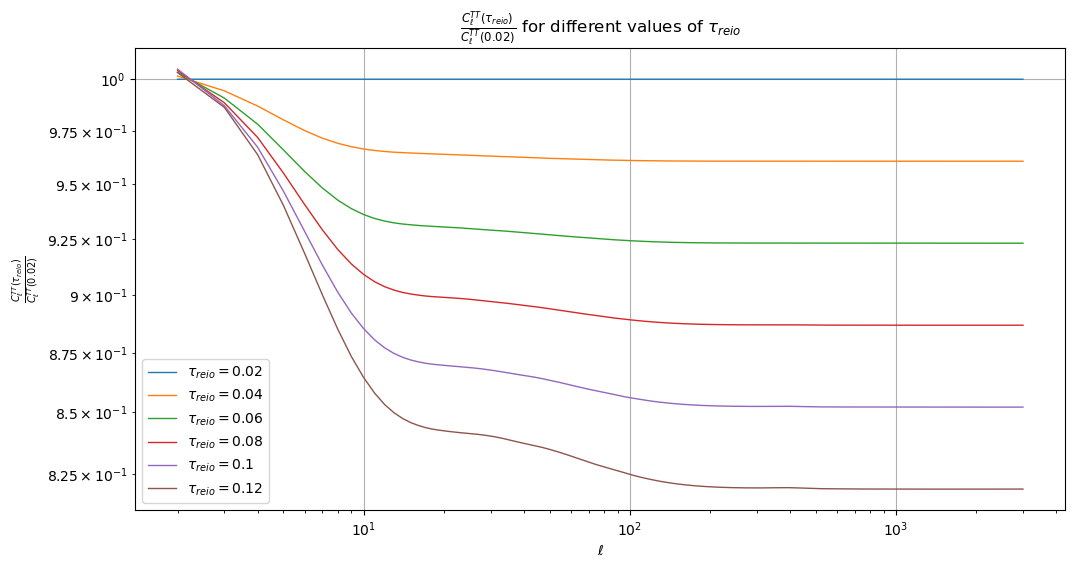

In [166]:
plt.figure(figsize=(12, 6))
#plt.xlim([2,3000])
for i in range(a):
    l = ell_list[i * alpha+2:(i + 1) * alpha]
    ee = np.array(TT_list[(i * alpha)+2:(i + 1) * alpha])/np.array(TT_list[2:alpha])
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l, ee, lw=1, label=string)
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TT}(\tau_{reio})}{C_{\ell}^{TT}(0.02)}$')
plt.title(r'$\frac{C_{\ell}^{TT}(\tau_{reio})}{C_{\ell}^{TT}(0.02)}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  